In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# mnist 데이터 호출

(X_train, _), (X_test, _) = mnist.load_data() # img만 가져오기
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
# 28*28 img (1:흑백) >> 실수 변경 >> 정규화(255 나눔)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [3]:
# 생성자 모델 생성
autoencoder = Sequential()

# 인코딩
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [4]:
# 디코딩
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) # padding='same' 빠짐 >> 차원 축소
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [5]:
# 전체 구조 확인
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [6]:
# 환경설정 및 학습

# 환경설정(compile)
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam')

# 학습 (fit)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 11s 13ms/step - loss: 0.2161 - val_loss: 0.1411
Epoch 2/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1302 - val_loss: 0.1200
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1169 - val_loss: 0.1118
Epoch 4/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1104 - val_loss: 0.1069
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1063 - val_loss: 0.1035
Epoch 6/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1034 - val_loss: 0.1024
Epoch 7/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1012 - val_loss: 0.0990
Epoch 8/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0993 - val_loss: 0.0972
Epoch 9/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0977 - val_loss: 0.0960
Epoch 10/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0963 - val_l

In [7]:
# 결과 출력
random_test = np.random.randint(X_test.shape[0], size=5)

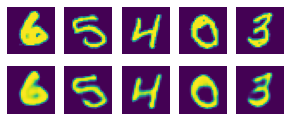

In [38]:
# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test) 

# 그래프로 확인
plt.figure(figsize=(7,2)) # 출력될 이미지 크기 정하기

for i, image_idx in enumerate(random_test):
    # 랜덤으로 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2, 7, i+1)
    # 테스트할 이미지를 먼저 그대로 보여줌
    plt.imshow(X_test[image_idx].reshape(28,28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    # 오토인코딩 결과를 다음 열에 입력
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()